In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
!pip install pystan
!pip install fbprophet

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet

In [7]:
ts = pd.read_csv('../input/passengers.csv')



In [8]:
ts.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
ts['Month'] = pd.DatetimeIndex(ts['Month'])

In [12]:
ts.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
ts = ts.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

ts.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


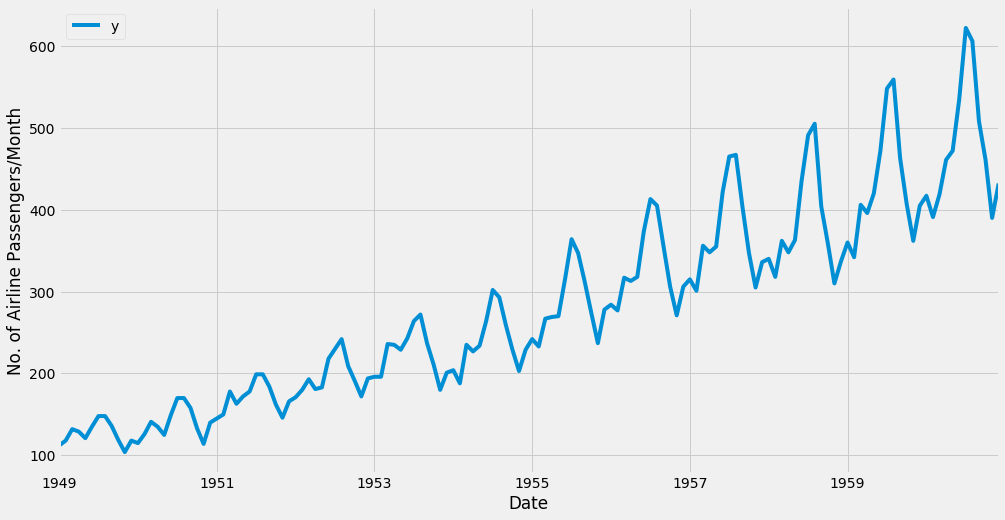

In [14]:
pd.plotting.register_matplotlib_converters()
ax = ts.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('No. of Airline Passengers/Month')
ax.set_xlabel('Date')

plt.show()

In [15]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
Model = Prophet(interval_width=0.95)

In [16]:
Model.fit(ts)

In [17]:
# Use make_future_dataframe() with a monthly frequency and periods = 36 for 3 years
future_dates = Model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [18]:
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.146447,38.836150,133.836793,107.146447,107.146447,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,0.0,0.0,0.0,85.667868
1,1949-02-01,109.300675,33.997200,122.515814,109.300675,109.300675,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,0.0,0.0,0.0,79.176553
2,1949-03-01,111.246429,67.723988,155.255885,111.246429,111.246429,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,0.0,0.0,0.0,110.839332
3,1949-04-01,113.400657,63.911246,152.186138,113.400657,113.400657,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,0.0,0.0,0.0,108.472210
4,1949-05-01,115.485393,68.793554,153.035233,115.485393,115.485393,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,0.0,0.0,0.0,111.854130


In [19]:
# Subset above mentioned columns and view the tail 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.059659,607.203438,694.995551
176,1963-09-01,602.755802,561.094966,645.669929
177,1963-10-01,566.569663,522.390200,607.117342
178,1963-11-01,534.733242,490.373592,577.941223
179,1963-12-01,564.363327,518.282644,607.111310


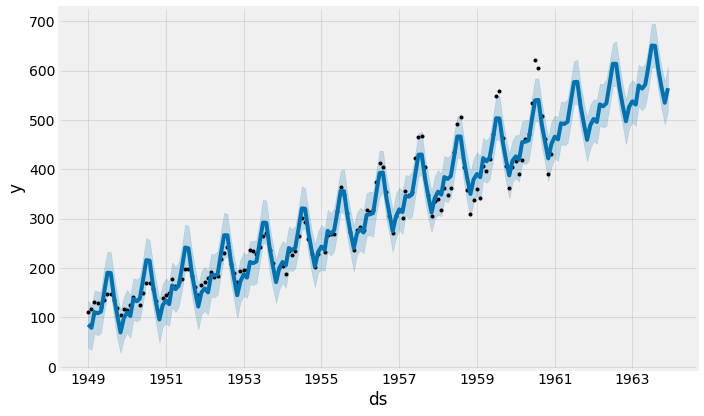

In [20]:
# Use Prophet's plot method to plot the predictions
Model.plot(forecast, uncertainty=True)
plt.show()

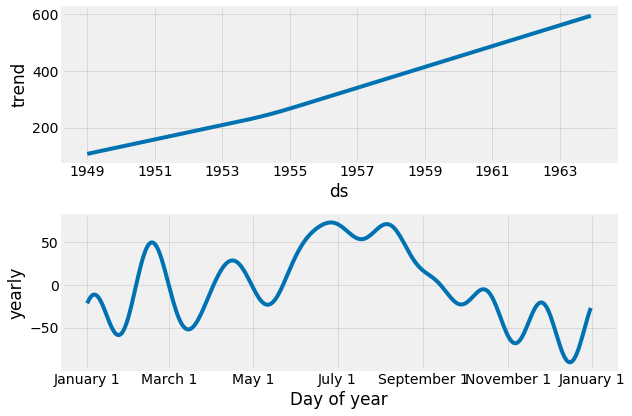

In [21]:
# Plot model components 
Model.plot_components(forecast)
plt.show()

done with lab